In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import scipy.io
import pickle

In [35]:
path = os.path.abspath("../data/03_modelling/dataset_reach.csv")

In [36]:
dataset=pd.read_csv(path,index_col=0)

# open a file, where you stored the pickled data
file = open('../data/03_modelling/dict.reaching_segments', 'rb')

# dump information to that file
reaching_seg = pickle.load(file) 

# close the file
file.close()

In [53]:
abs(dataset.corr().time_end).sort_values()[-20:]

TB_dd_1     0.447494
ED_5        0.454011
TB_5        0.478562
TB_d_2      0.479497
ED_dd_4     0.483079
TB_d_5      0.521878
ED_d_2      0.548752
TB_6        0.556024
ED_dd_3     0.562884
ED_6        0.569468
TB_d_3      0.574589
ED_d_6      0.593027
reach       0.601297
ED_dd_2     0.608225
TB_d_4      0.608570
ED_d_3      0.624353
ED_d_5      0.625497
ED_dd_1     0.628130
ED_d_4      0.638672
time_end    1.000000
Name: time_end, dtype: float64

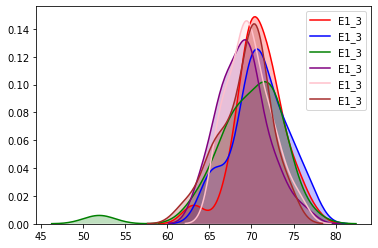

In [5]:
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 2], color="Red", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 3], color="blue", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 4], color="green", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 5], color="purple", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 6], color="pink", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["reach"] == 7], color="brown", shade = True)

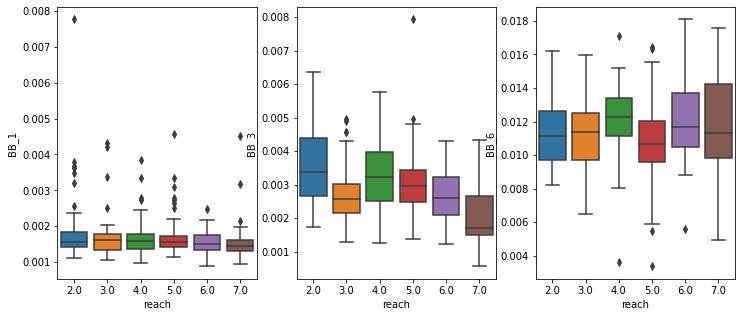

In [6]:
fig = plt.figure(figsize =[25,5])

sig = 'BB'

ax1 = fig.add_subplot(161)
sns.boxplot(x="reach", y = sig+"_1",data = dataset)

ax3 = fig.add_subplot(162)
sns.boxplot(x="reach", y = sig+"_3",data = dataset)

ax2 = fig.add_subplot(163)
sns.boxplot(x="reach", y = sig+"_6",data = dataset)

# plt.close(2)
# plt.close(3)
#plt.tight_layout()

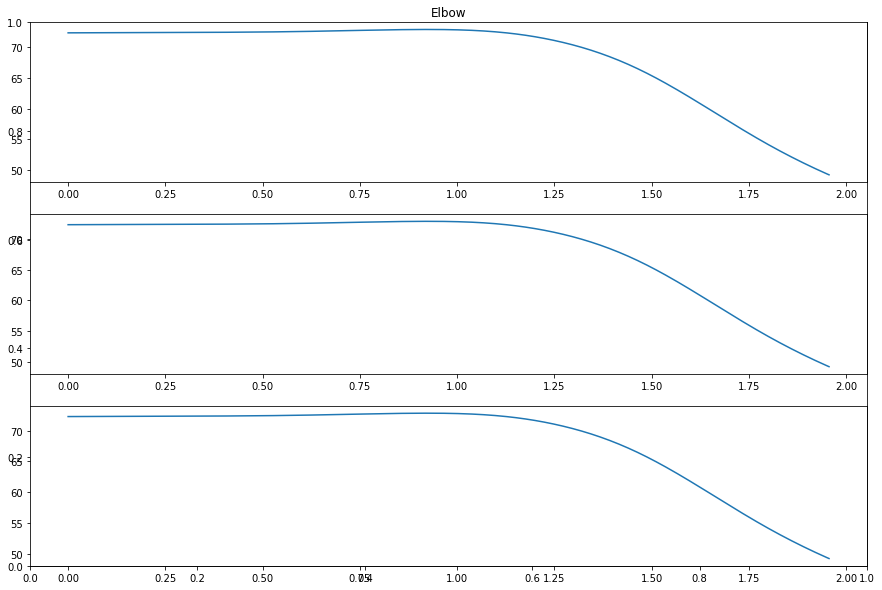

In [70]:
fig = plt.figure(figsize =[15,10])

plt.title('Elbow')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

plt.show()

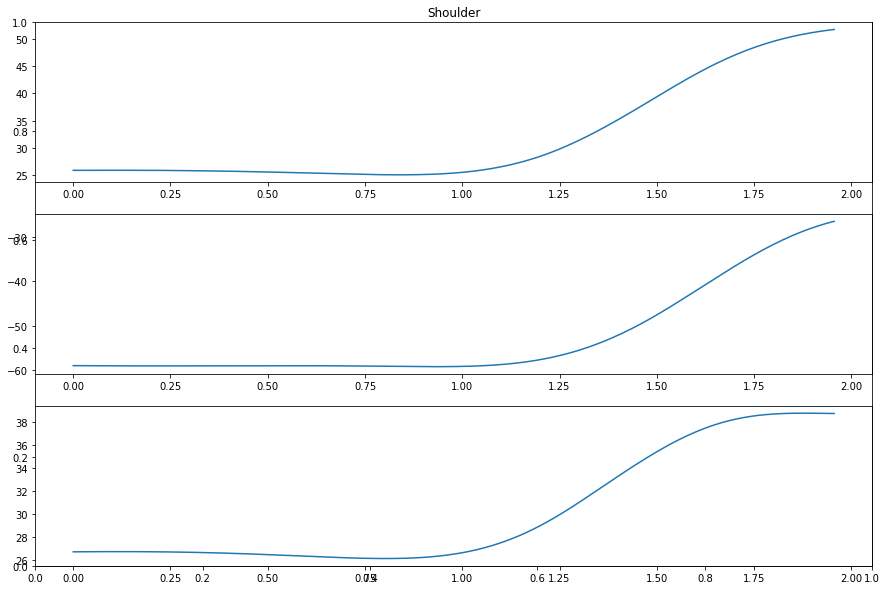

In [7]:
fig = plt.figure(figsize =[15,10])

plt.title('Shoulder')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S2)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S3)

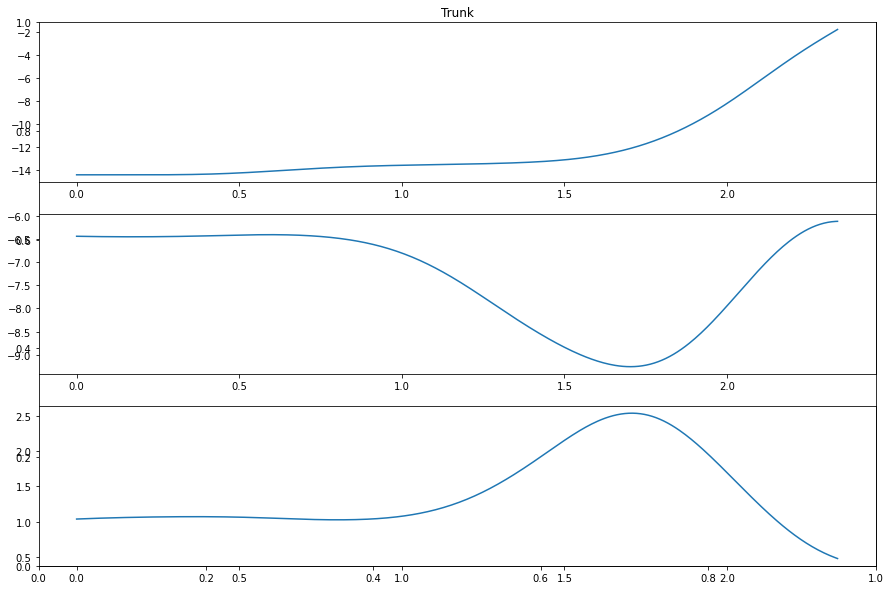

In [8]:
fig = plt.figure(figsize =[15,10])

plt.title('Trunk')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T2)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T3)

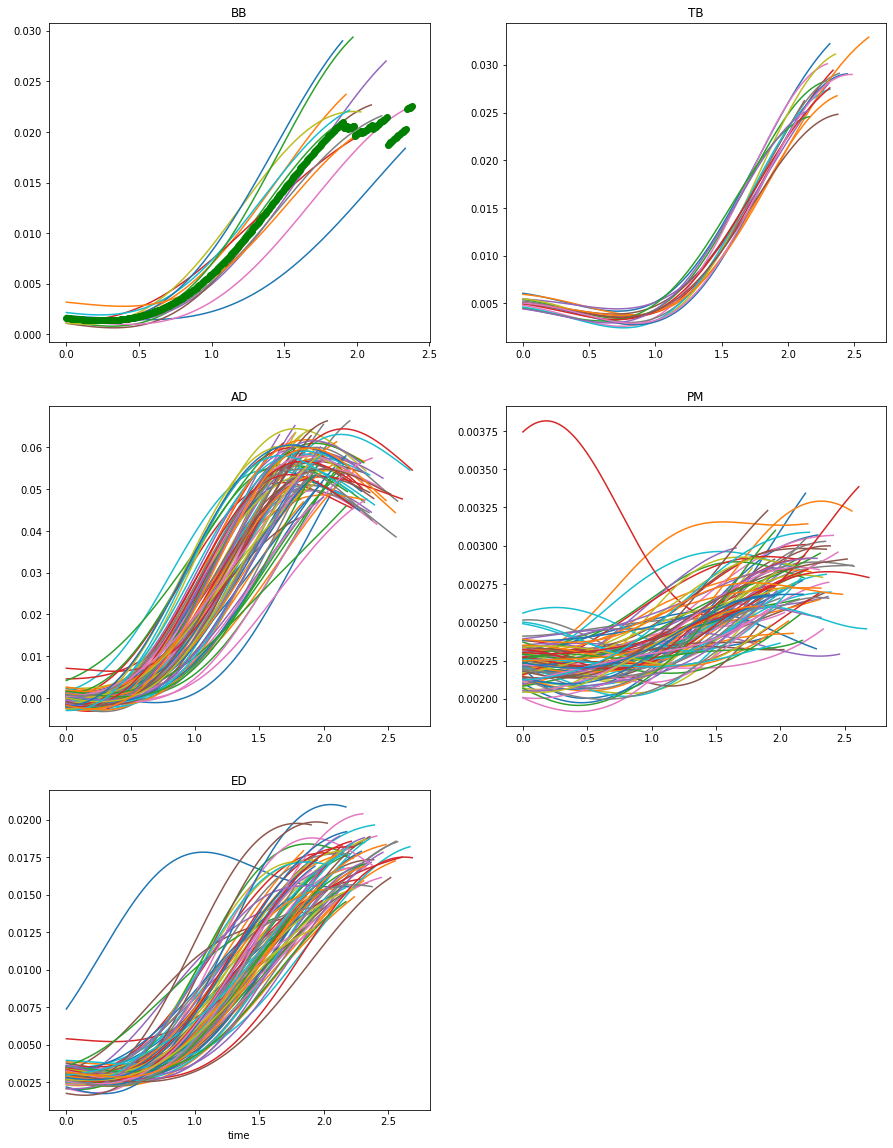

In [192]:
fig = plt.figure(figsize =[15,20])

#plt.title('ED')

ax6 = fig.add_subplot(321)
[plt.plot(reaching_seg[0][j].time, reaching_seg[0][j].BB) for j in range(0,len(reaching_seg[0])) if reaching_seg[0][j].prev_command[0] ==7]
plt.plot(df2.time,df2.mean_path,'go',lw=2)
ax6.set_title('BB')

ax7 = fig.add_subplot(322)
ax7.set_title('TB')
[plt.plot(reaching_seg[0][j].time, reaching_seg[0][j].TB) for j in range(0,len(reaching_seg[0]))if reaching_seg[0][j].prev_command[0] ==3]

ax8 = fig.add_subplot(323)
ax8.set_title('AD')
[plt.plot(reaching_seg[0][j].time, reaching_seg[0][j].AD) for j in range(0,len(reaching_seg[0]))]

ax9 = fig.add_subplot(324)
ax9.set_title('PM')
[plt.plot(reaching_seg[0][j].time, reaching_seg[0][j].PM) for j in range(0,len(reaching_seg[0]))]

ax10 = fig.add_subplot(325)
ax10.set_title('ED')
[plt.plot(reaching_seg[0][j].time, reaching_seg[0][j].ED) for j in range(0,len(reaching_seg[0]))]

plt.xlabel('time')
plt.show()


In [5]:
def prepare_time_segment():

    df8 = pd.DataFrame()
    df = {}

    trials = 3
    #a = []
    df_command = pd.DataFrame()
    k=0

    lst = ['E1','E2','E3','S1','S2','S3','T1','T2','T3','BB','TB','AD','PM','ED']
    for sig in lst:

        df[k] = pd.DataFrame()
        for trial in range(0,trials-1):

            for j in range(0,len(reaching_seg[trial])):

                if j in reaching_seg[trial] and reaching_seg[trial][j].prev_command[0] >= 2.0:

                    df[k] = df[k].append(reaching_seg[trial][j][reaching_seg[trial][j].time<1.6][sig],ignore_index=True)

                    if sig == 'E1':
                        g = pd.Series(np.ones(len(reaching_seg[trial][j][reaching_seg[trial][j].time<1.6].E1))*reaching_seg[trial][j].prev_command[0])
                        df_command = df_command.append(g,ignore_index=True)

        df[k] = df[k].T
        df8 = df8.append(pd.Series(df[k].values.flatten()),ignore_index=True) 
        k=k+1

    t = np.linspace(0,0.006*(np.shape(df[0])[0]-1),np.shape(df[0])[0])
    t = t.round(3)
    h = t

    for i in range(0,np.shape(df[0])[1]-1):
        h = np.append(h,t)

    h.sort()  

    df_command = df_command.T
    k = pd.DataFrame(df_command.values.flatten())

    df8 = df8.T
    df8.columns = lst 

    df8['command'] = k
    df8['time'] = h
    
    return df8



In [6]:
def left_right_center(command):
    if command == 2 or command == 5:
        return 'left'
    elif command == 4 or command == 7:
        return 'right'
    else:
        return 'center'
    
def front_back(command):
    if command == 2 or command == 3 or command == 4:
        return 'back'
    else:
        return 'front'
        

In [9]:
df8 = prepare_time_segment()
df8['LRC'] = df8.apply(lambda x: left_right_center(x['command']),axis=1)
df8['FB'] = df8.apply(lambda x: front_back(x['command']),axis=1)

In [11]:
df8

,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,command,time,LRC,FB
0,72.253929,89.030685,26.150529,21.726564,-49.830156,20.948831,-17.979301,-2.993113,-1.106940,0.001499,0.005856,-0.000701,0.002267,0.003106,2.0,0.000,left,back
1,77.027100,88.788132,23.214279,21.408355,-63.182854,22.963678,-15.682779,0.435545,0.022459,0.001042,0.006069,-0.002267,0.002192,0.003478,3.0,0.000,center,back
2,73.371591,86.700938,20.582065,27.346014,-64.592266,28.969223,-14.388443,-0.216548,0.323046,0.001766,0.005832,0.000119,0.002275,0.003105,4.0,0.000,right,back
3,75.670993,87.315029,21.283304,25.425284,-63.857038,27.096409,-14.851425,-0.782172,0.888211,0.001307,0.005954,0.000198,0.002343,0.003521,3.0,0.000,center,back
4,72.300523,87.034020,19.327883,25.905120,-58.985012,26.673713,-16.194544,-2.586347,1.623215,0.002505,0.005119,0.000669,0.002215,0.003240,5.0,0.000,left,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47788,59.735136,86.117459,8.425816,34.658161,-48.088356,32.148159,-11.963334,-3.902700,3.396023,0.013652,0.012539,0.066123,0.002694,0.011252,2.0,1.596,left,back
47789,58.342495,82.420405,7.970968,39.265757,-40.343214,34.683488,-15.738545,-6.921147,3.195979,0.013244,0.005661,0.041560,0.002604,0.011941,5.0,1.596,left,front
47790,56.024330,83.205669,7.661495,35.289697,-44.883151,32.150148,-13.693282,-8.209813,3.464201,0.010747,0.009842,0.057394,0.002408,0.013425,3.0,1.596,center,back
47791,57.696921,85.797998,4.437106,34.769509,-42.997362,31.637636,-13.374610,-9.871921,2.029057,0.014635,0.004548,0.033595,0.002554,0.010785,6.0,1.596,center,front


In [10]:
reaching_seg[0][1]

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,...,T2_dd,T3_dd,BB_dd,TB_dd,AD_dd,PM_dd,ED_dd,pressure_dd,command_start,prev_command
0,0.000,72.253929,89.030685,26.150529,21.726564,-49.830156,20.948831,-17.979301,-2.993113,-1.106940,...,2.841699,-3.657808,0.004705,-0.005279,0.027898,0.000956,0.004252,-34.563720,3.0,2.0
1,0.006,72.252249,89.031532,26.153408,21.720495,-49.830234,20.944901,-17.975588,-2.992735,-1.103319,...,2.964170,-3.584699,0.004842,-0.005157,0.028659,0.000973,0.004358,-65.793228,-1.0,-1.0
2,0.012,72.250707,89.032316,26.156273,21.714524,-49.830508,20.941045,-17.971920,-2.992245,-1.099824,...,3.084763,-3.511161,0.004979,-0.005032,0.029422,0.000989,0.004464,-28.632845,-1.0,-1.0
3,0.018,72.249304,89.033037,26.159125,21.708650,-49.830986,20.937259,-17.968295,-2.991641,-1.096454,...,3.203455,-3.437396,0.005117,-0.004904,0.030188,0.001006,0.004570,8.160810,-1.0,-1.0
4,0.024,72.248039,89.033696,26.161967,21.702869,-49.831676,20.933542,-17.964714,-2.990916,-1.093204,...,3.320219,-3.363599,0.005256,-0.004772,0.030956,0.001022,0.004677,7.779911,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2.190,27.602965,73.044928,1.741808,66.101557,-14.502745,41.441905,-5.514574,7.210294,1.363916,...,-57.148397,2.214178,-0.018091,-0.039385,-0.038566,0.000398,-0.013267,46.310399,-1.0,-1.0
366,2.196,27.635277,72.942496,1.681979,66.111063,-14.579762,41.436019,-5.402591,7.284793,1.360039,...,-57.505266,2.364176,-0.018015,-0.039362,-0.037867,0.000389,-0.013198,53.347231,-1.0,-1.0
367,2.202,27.671927,72.841299,1.621239,66.119252,-14.658127,41.430482,-5.291999,7.357210,1.356252,...,-57.815951,2.515307,-0.017935,-0.039329,-0.037175,0.000380,-0.013127,47.753377,-1.0,-1.0
368,2.208,27.712788,72.741346,1.559582,66.126183,-14.737743,41.425322,-5.182841,7.427536,1.352561,...,-58.083514,2.667859,-0.017852,-0.039288,-0.036488,0.000371,-0.013053,56.085103,-1.0,-1.0


<Figure size 432x288 with 0 Axes>

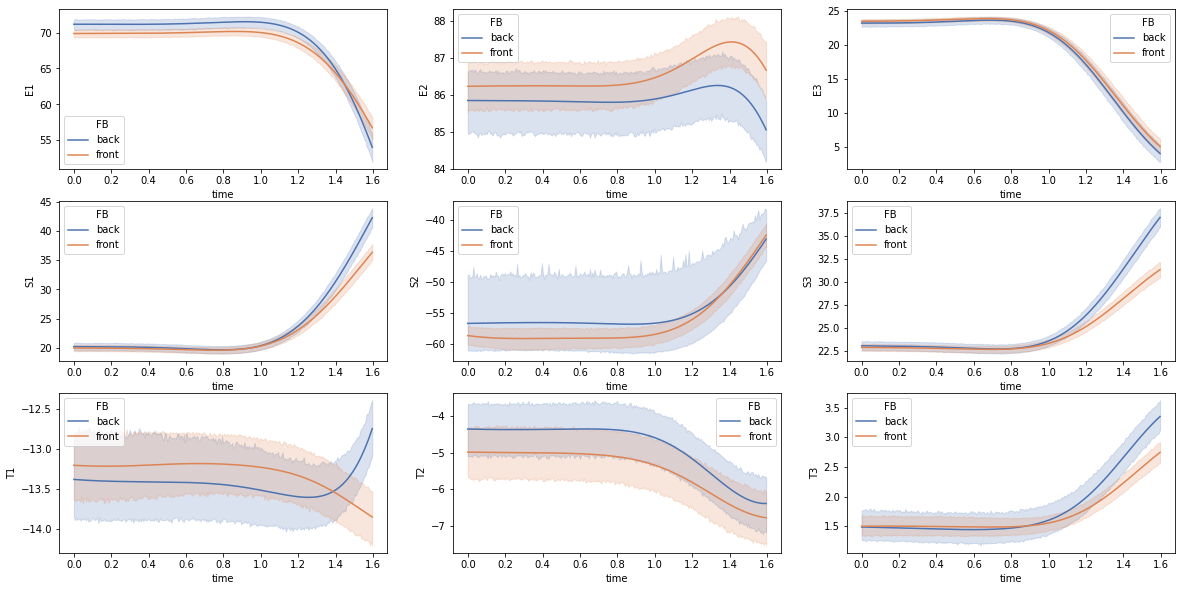

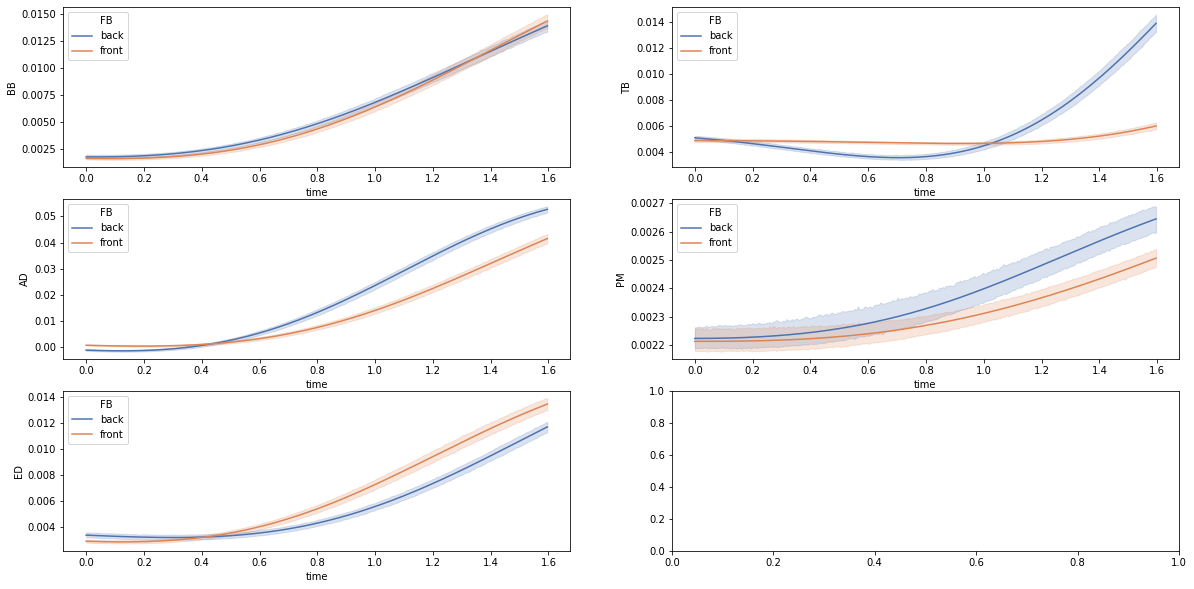

In [12]:
hue = 'FB'

plt.figure(1)

f, axes = plt.subplots(3,3, figsize=(20,10))

angles = ['E1','E2','E3','S1','S2','S3','T1','T2','T3']

for com in angles:
    com_index = angles.index(com) 
    
    if com_index <3:
        row =0
    elif com_index > 2 and com_index < 6:
        com_index = com_index%3
        row = 1
    elif com_index > 5:
        com_index = com_index%3
        row = 2
        
    sns.lineplot(x= 'time', y = com ,hue=hue,data = df8,legend = 'full', palette = 'deep',markers=True, ax=axes[row,com_index]) #axes[0]

plt.figure(2)

ma = ['BB','TB','AD','PM','ED']
f, axes = plt.subplots(3,2, figsize=(20,10))

for com in ma:
    com_index = ma.index(com) 
    
    if com_index <2:
        row =0
    elif com_index > 1 and com_index < 4:
        com_index = com_index%2
        row = 1
    elif com_index > 3:
        com_index = com_index%2
        row = 2
        
    sns.lineplot(x= 'time', y = com ,hue=hue,data = df8,legend = 'full', palette = 'deep',markers=True, ax=axes[row,com_index]) #axes[0]
    

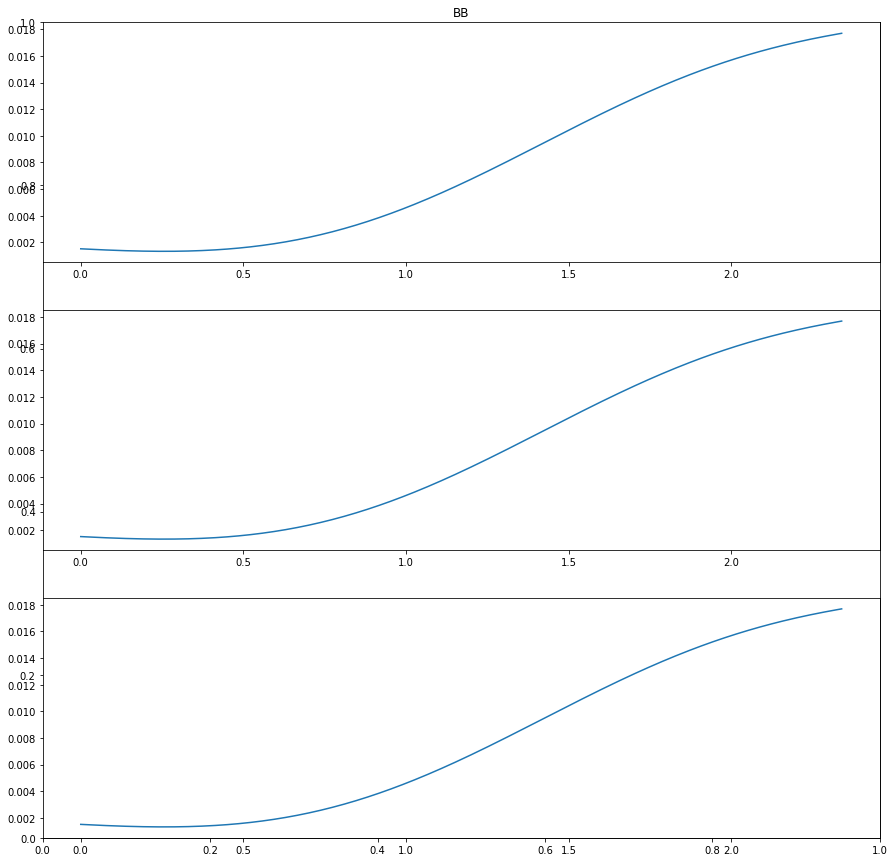

In [71]:
fig = plt.figure(figsize =[15,15])

plt.title('BB')

ax6 = fig.add_subplot(311)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].BB)

ax7 = fig.add_subplot(312)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].BB)

ax8 = fig.add_subplot(313)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].BB)